In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Loading the data

In [2]:
# Load the data
df_train = pd.read_csv("/media/Personal/USTH/Year_3/MLinMedicine/prac1/mitbih_train.csv", header=None)
df_test = pd.read_csv("/media/Personal/USTH/Year_3/MLinMedicine/prac1/mitbih_test.csv", header=None)

# EDA

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


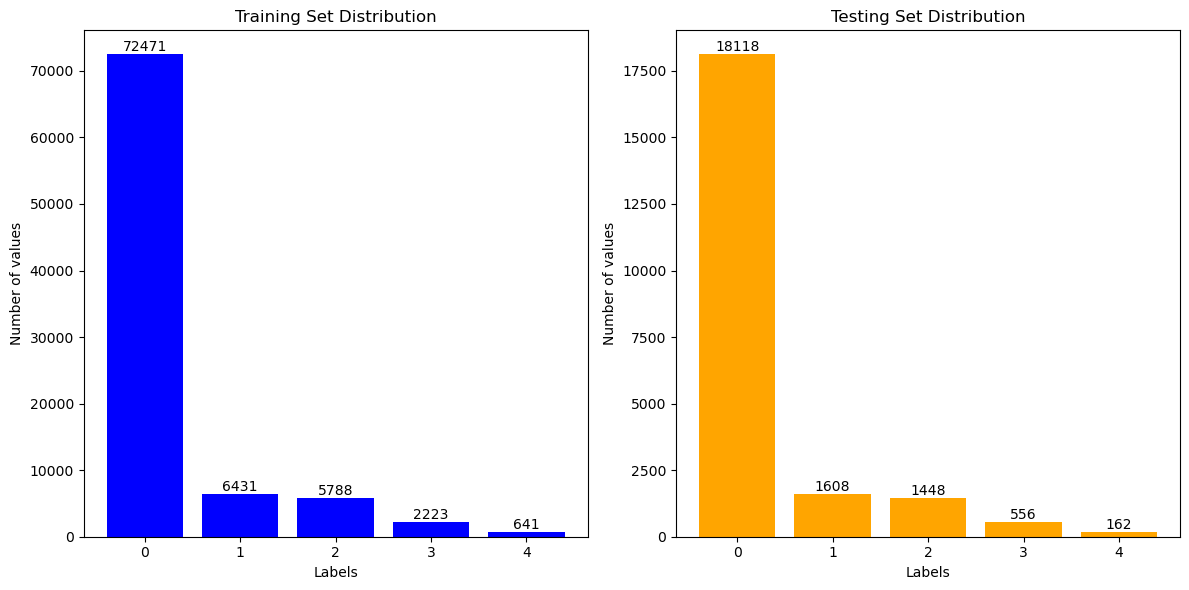

In [3]:
plt.figure(figsize=(12, 6))

# First subplot for training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
bars_train = plt.bar(df_train[df_train.columns[-1]].unique(), df_train[df_train.columns[-1]].value_counts(), color='b')
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Training Set Distribution")
for bar in bars_train:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Second subplot for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
bars_test = plt.bar(df_test[df_test.columns[-1]].unique(), df_test[df_test.columns[-1]].value_counts(), color='orange')
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Testing Set Distribution")
for bar in bars_test:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()


# Transformation

In [4]:
X_train = df_train.drop(df_train.columns[-1], axis=1)
y_train = df_train[df_train.columns[-1]] 
X_test = df_test.drop(df_test.columns[-1], axis=1)
y_test = df_test[df_test.columns[-1]] 

In [5]:
# Labeling data
encoder = LabelEncoder()
encoder.fit_transform(y_train)
encoder.transform(y_test)

array([0, 0, 0, ..., 4, 4, 4])

In [10]:
# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [20]:
# Apply SMOTETomek to balance the training set
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resample_tomek, y_train_resample_tomek = smote_tomek.fit_resample(X_train, y_train)

In [21]:
print(X_train_resample.shape, y_train_resample.shape)
print(X_train_resample_tomek.shape, y_train_resample_tomek.shape)
print(X_test.shape, y_test.shape)

(362355, 187) (362355,)
(362351, 187) (362351,)
(21892, 187) (21892,)


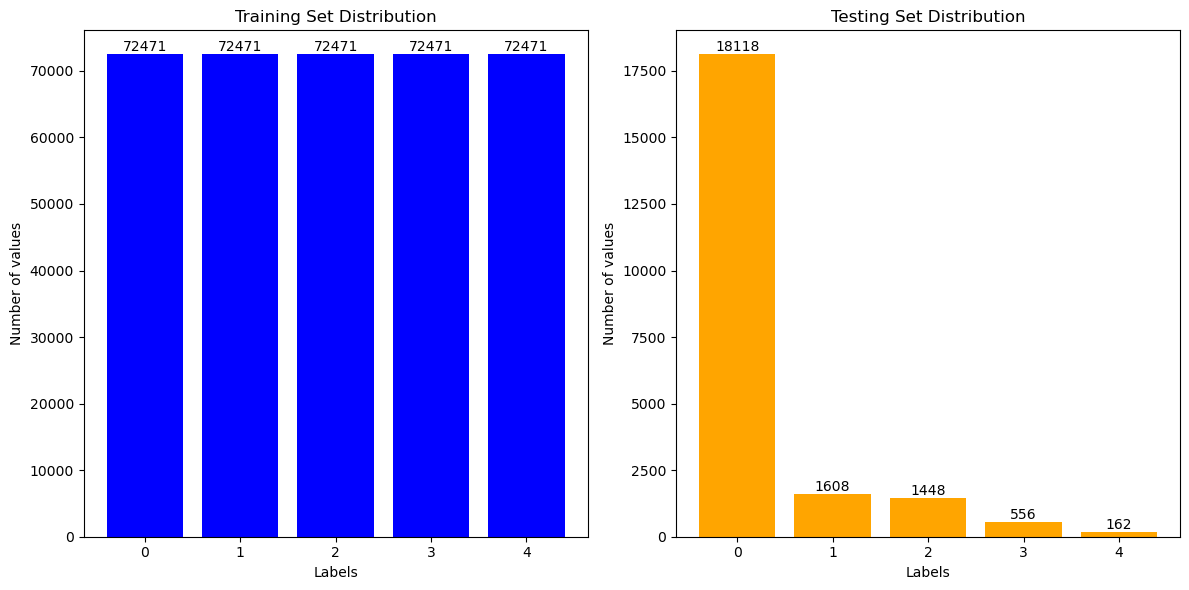

In [12]:
# After SMOTE resampling
plt.figure(figsize=(12, 6))

# First subplot for training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
bars_train = plt.bar(y_train_resample.unique(), y_train_resample.value_counts(), color='b')
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Training Set Distribution")
for bar in bars_train:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Second subplot for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
bars_test = plt.bar(y_test.unique(), y_test.value_counts(), color='orange')
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Testing Set Distribution")
for bar in bars_test:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()

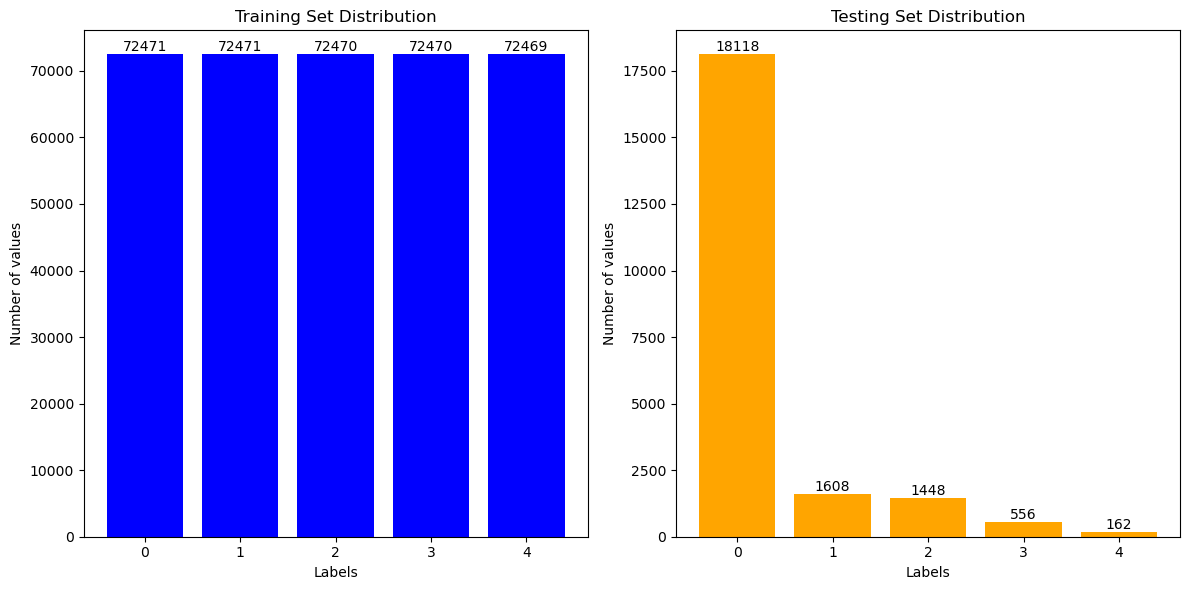

In [22]:
# After SMOTETomek resampling
plt.figure(figsize=(12, 6))

# First subplot for training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
bars_train = plt.bar(y_train_resample_tomek.unique(), y_train_resample_tomek.value_counts(), color='b')
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Training Set Distribution")
for bar in bars_train:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Second subplot for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
bars_test = plt.bar(y_test.unique(), y_test.value_counts(), color='orange')
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Testing Set Distribution")
for bar in bars_test:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()

# Model Building

In [13]:
# Random Forest Classifier with SMOTE resampling
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(random_state=42)

In [23]:
# Random Forest Classifier with SMOTETomek resampling
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train_resample_tomek, y_train_resample_tomek)

RandomForestClassifier(random_state=42)

In [6]:
# Random Forest Classifier with option class_weight
rf3 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [11]:
# y_pred = rf.predict(X_test)
# y_pred2 = rf2.predict(X_test)
y_pred3 = rf3.predict(X_test)

In [9]:
def evaluate_model(y_true, y_pred, class_names=None):
    # Print metrics
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    
    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

Accuracy: 0.980586515622145
Precision: 0.9800681449844614
Recall: 0.980586515622145
F1 Score: 0.9801673562214609

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.88      0.76      0.81       556
         2.0       0.97      0.93      0.95      1448
         3.0       0.81      0.73      0.77       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892



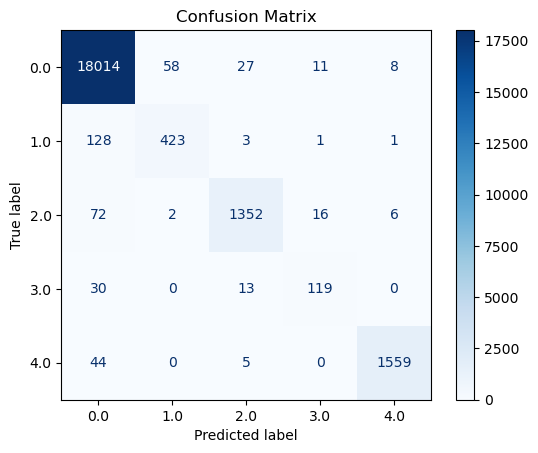

In [18]:
evaluate_model(y_test, y_pred, class_names=encoder.classes_)

Accuracy: 0.980358121688288
Precision: 0.9798823186134991
Recall: 0.980358121688288
F1 Score: 0.9800258988848706

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.85      0.77      0.81       556
         2.0       0.96      0.94      0.95      1448
         3.0       0.82      0.75      0.78       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892



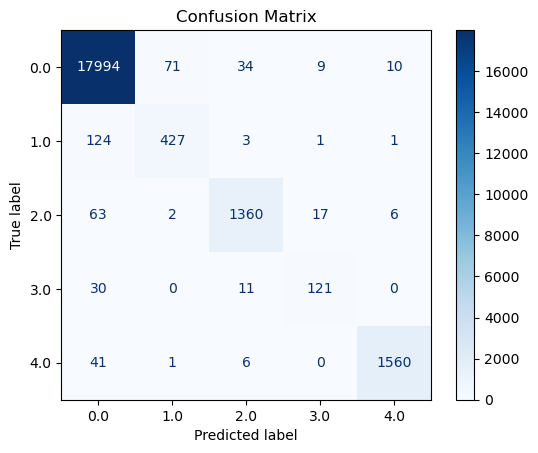

In [25]:
evaluate_model(y_test, y_pred2, class_names=encoder.classes_)

Accuracy: 0.9730038370180888
Precision: 0.9728548879665289
Recall: 0.9730038370180888
F1 Score: 0.9711474340054016

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.97      0.59      0.73       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.82      0.58      0.68       162
         4.0       1.00      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.80      0.86     21892
weighted avg       0.97      0.97      0.97     21892



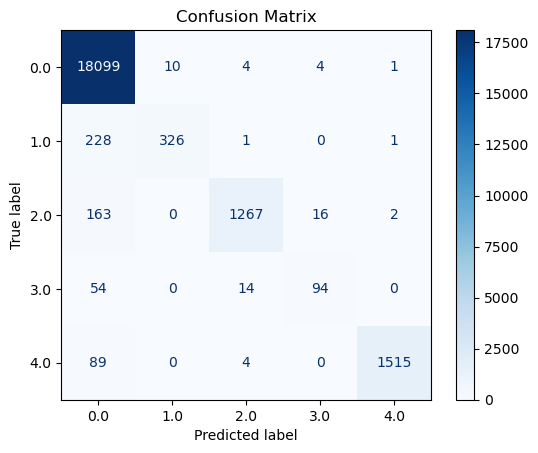

In [12]:
evaluate_model(y_test, y_pred3, class_names=encoder.classes_)